In [1]:
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
import torch
import numpy as np

In [2]:
! pip install opencv-python pytesseract

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [4]:
import cv2
import matplotlib.pyplot as plt

In [62]:
img = cv2.imread('src.jpeg')

In [63]:
text = pytesseract.image_to_string(img)
print(text)

© Oa

Allow Instagram to
use your app and
website activity?

To provide a better ads experience,
we need permission to use future
activity that other apps and websites
send us from this device. This won't
give us access to new types of
information. Learn more about how
we limit our use of your activity if you
turn off this device setting, and
related settings on Instagram.

Make Ads Less Personalized




In [64]:
import numpy as np

# Split the text into a list of strings based on newlines
text_lines = text.splitlines()
text_list = []
# Display the result
for line in text_lines:
    print(line)
    text_list.append(line)

© Oa

Allow Instagram to
use your app and
website activity?

To provide a better ads experience,
we need permission to use future
activity that other apps and websites
send us from this device. This won't
give us access to new types of
information. Learn more about how
we limit our use of your activity if you
turn off this device setting, and
related settings on Instagram.

Make Ads Less Personalized



In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
import pandas as pd
data = pd.read_csv('normie.csv')

In [67]:
data

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,0.0
1,SOME EXCLUSIONS APPLY - LEARN MORE,0.0
2,HAVE A QUESTION? - CONTACT US,0.0
3,WELCOME TO 034MOTORSPORT!,0.0
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,0.0
...,...,...
2695,$5 Off Your Next Order,1.0
2696,©-2019 Barnaby Ltd dba Good Vibrations,0.0
2697,NaN,0.0
2698,18 U.S.C. §2257 Recordkeeping Requirements Com...,0.0


In [68]:
data['classification'].value_counts()

0.0    2094
1.0     605
Name: classification, dtype: int64

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [70]:
data = data.dropna()

In [71]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [114]:
df1 = pd.read_csv('normie.csv')
df2 = pd.read_csv('dark_patterns.csv')

In [115]:
df1 = df1[pd.notnull(df1["Pattern String"])]
df1 = df1[df1["classification"] == 0]
df1["classification"] = "Not Dark"
df1.drop_duplicates(subset="Pattern String")

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,Not Dark
1,SOME EXCLUSIONS APPLY - LEARN MORE,Not Dark
2,HAVE A QUESTION? - CONTACT US,Not Dark
3,WELCOME TO 034MOTORSPORT!,Not Dark
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,Not Dark
...,...,...
2692,Jobs,Not Dark
2694,Join Our List Get,Not Dark
2696,©-2019 Barnaby Ltd dba Good Vibrations,Not Dark
2698,18 U.S.C. §2257 Recordkeeping Requirements Com...,Not Dark


In [116]:
df2 = df2[pd.notnull(df2["Pattern String"])]
df2["classification"] = "Dark"
col = ["Pattern String", "classification"]
df2 = df2[col]

df = pd.concat([df1, df2])

In [117]:
X_train_tfidf

<5762x5374 sparse matrix of type '<class 'numpy.float64'>'
	with 33372 stored elements in Compressed Sparse Row format>

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Pattern String'], df["classification"], train_size = .25)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = BernoulliNB().fit(X_train_tfidf, y_train)

y_pred = clf.predict(count_vect.transform(X_test))

print("Accuracy: ", metrics.accuracy_score(y_pred, y_test))

Accuracy:  0.949119373776908


In [119]:
df

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,Not Dark
1,SOME EXCLUSIONS APPLY - LEARN MORE,Not Dark
2,HAVE A QUESTION? - CONTACT US,Not Dark
3,WELCOME TO 034MOTORSPORT!,Not Dark
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,Not Dark
...,...,...
1810,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,Dark
1812,Compare at,Dark
1813,$132.90 $99.00,Dark
1814,This offer is only VALID if you add to cart now!,Dark


In [120]:
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [121]:
X_train = df['Pattern String']
y_train = df["classification"]

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [122]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
nb_classifier = BernoulliNB()
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [123]:
ensemble_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier), ('nb', nb_classifier), ('gb', gb_classifier)],
    voting='soft'  
)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_counts = count_vect.transform(X_train)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)

In [125]:
ensemble_classifier.fit(X_train_tfidf, y_train)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

y_pred = ensemble_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")

Ensemble Model Accuracy: 0.966275659824047


In [126]:
from sklearn.metrics import classification_report

In [127]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Dark       0.97      0.94      0.96       270
    Not Dark       0.96      0.98      0.97       412

    accuracy                           0.97       682
   macro avg       0.97      0.96      0.96       682
weighted avg       0.97      0.97      0.97       682



In [128]:
text_list_counts = count_vect.transform(text_list)
X_tfidf = tfidf_transformer.transform(text_list_counts)
y_pred = ensemble_classifier.predict(X_tfidf)

results_df = pd.DataFrame({
    'Pattern String': text_list,
    'Predicted Classification': y_pred
})

results_df

,Pattern String,Predicted Classification
0,© Oa,Not Dark
1,,Not Dark
2,Allow Instagram to,Not Dark
3,use your app and,Not Dark
4,website activity?,Not Dark
5,,Not Dark
6,"To provide a better ads experience,",Not Dark
7,we need permission to use future,Not Dark
8,activity that other apps and websites,Not Dark
9,send us from this device. This won't,Dark


In [129]:
results_df['Predicted Classification'].value_counts()

Not Dark    15
Dark         3
Name: Predicted Classification, dtype: int64

In [130]:
dark_rows = results_df[results_df['Predicted Classification'] == 'Dark']

dark_patterns = dark_rows['Pattern String'].tolist()

print(dark_patterns)

["send us from this device. This won't", 'we limit our use of your activity if you', 'turn off this device setting, and']


In [144]:
text_ = dark_patterns

In [134]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


ERROR: Could not find a version that satisfies the requirement paddlepaddle-gpu==2.0.0 (from versions: 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0, 2.5.1, 2.5.2, 2.6.0)
ERROR: No matching distribution found for paddlepaddle-gpu==2.0.0


In [135]:
!pip install paddleocr

In [136]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [137]:
!pip install paddlepaddle

In [138]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

In [139]:
ocr_model = PaddleOCR()

[2024/01/18 23:05:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\abhra/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\abhra/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [140]:
img_path = os.path.join('.', 'src.jpeg')

In [141]:
result = ocr_model.ocr(img_path)

[2024/01/18 23:05:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/01/18 23:05:38] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.25234031677246094
[2024/01/18 23:05:41] ppocr DEBUG: rec_res num  : 14, elapsed : 3.389214038848877


In [142]:
result

[[[[[59.0, 145.0], [260.0, 145.0], [260.0, 166.0], [59.0, 166.0]],
   ('AllowInstagramto', 0.9520810842514038)],
  [[[66.0, 176.0], [253.0, 174.0], [253.0, 194.0], [66.0, 197.0]],
   ('useyourappand', 0.9959592819213867)],
  [[[67.0, 203.0], [250.0, 203.0], [250.0, 224.0], [67.0, 224.0]],
   ('websiteactivity?', 0.9904838800430298)],
  [[[48.0, 243.0], [269.0, 243.0], [269.0, 260.0], [48.0, 260.0]],
   ('Toprovideabetteradsexperience,', 0.9796985387802124)],
  [[[54.0, 263.0], [264.0, 263.0], [264.0, 277.0], [54.0, 277.0]],
   ('weneedpermission tousefuture', 0.9800140261650085)],
  [[[43.0, 279.0], [276.0, 279.0], [276.0, 296.0], [43.0, 296.0]],
   ('activitythatotherappsandwebsites', 0.9958651065826416)],
  [[[46.0, 298.0], [273.0, 298.0], [273.0, 312.0], [46.0, 312.0]],
   ("sendusfromthisdevice.Thiswon't", 0.9804925918579102)],
  [[[61.0, 315.0], [256.0, 314.0], [256.0, 331.0], [61.0, 332.0]],
   ('give us access tonew types of', 0.9233822822570801)],
  [[[46.0, 332.0], [269.0, 332

In [143]:
boxes = []
texts = []
scores = []

# Extract data from the nested structure
for outer_list in result:
    for inner_list in outer_list:
        if isinstance(inner_list, list) and inner_list:
            # Check if the element is a non-empty list
            inner_box_list = inner_list[0] if isinstance(inner_list[0], list) else None
            if inner_box_list:
                # Check if the first element of the inner list is a list
                box = inner_box_list
                boxes.append(box)
                # Extract text and score from the second element of the inner list
                text, score = inner_list[1] if len(inner_list) > 1 else (None, None)
                texts.append(text)
                scores.append(score)

# Print the extracted data
print("Boxes:", boxes)
print("Texts:", texts)
print("Scores:", scores)

Boxes: [[[59.0, 145.0], [260.0, 145.0], [260.0, 166.0], [59.0, 166.0]], [[66.0, 176.0], [253.0, 174.0], [253.0, 194.0], [66.0, 197.0]], [[67.0, 203.0], [250.0, 203.0], [250.0, 224.0], [67.0, 224.0]], [[48.0, 243.0], [269.0, 243.0], [269.0, 260.0], [48.0, 260.0]], [[54.0, 263.0], [264.0, 263.0], [264.0, 277.0], [54.0, 277.0]], [[43.0, 279.0], [276.0, 279.0], [276.0, 296.0], [43.0, 296.0]], [[46.0, 298.0], [273.0, 298.0], [273.0, 312.0], [46.0, 312.0]], [[61.0, 315.0], [256.0, 314.0], [256.0, 331.0], [61.0, 332.0]], [[46.0, 332.0], [269.0, 332.0], [269.0, 345.0], [46.0, 345.0]], [[41.0, 348.0], [277.0, 349.0], [277.0, 366.0], [41.0, 365.0]], [[60.0, 367.0], [258.0, 367.0], [258.0, 384.0], [60.0, 384.0]], [[63.0, 384.0], [253.0, 385.0], [253.0, 402.0], [63.0, 401.0]], [[68.0, 446.0], [252.0, 446.0], [252.0, 460.0], [68.0, 460.0]], [[66.0, 496.0], [253.0, 496.0], [253.0, 510.0], [66.0, 510.0]]]
Texts: ['AllowInstagramto', 'useyourappand', 'websiteactivity?', 'Toprovideabetteradsexperience,

In [145]:
text_

["send us from this device. This won't",
 'we limit our use of your activity if you',
 'turn off this device setting, and']

In [154]:
# Remove spaces from each sentence in the list
sentences_without_spaces = ["".join(sentence.split()) for sentence in text_]

# Print the result
senti=[]
for i, sentence in enumerate(sentences_without_spaces):
    senti.append(sentence)
    print(f"Sentence {i + 1}: {sentence}")

Sentence 1: sendusfromthisdevice.Thiswon't
Sentence 2: welimitouruseofyouractivityifyou
Sentence 3: turnoffthisdevicesetting,and


In [155]:
senti

["sendusfromthisdevice.Thiswon't",
 'welimitouruseofyouractivityifyou',
 'turnoffthisdevicesetting,and']

In [157]:
senti_to 

['AllowInstagramto',
 'useyourappand',
 'websiteactivity?',
 'Toprovideabetteradsexperience,',
 'weneedpermissiontousefuture',
 'activitythatotherappsandwebsites',
 "sendusfromthisdevice.Thiswon't",
 'giveusaccesstonewtypesof',
 'information.Learnmoreabouthow',
 'welimitouruseofyouractivityifyou',
 'turnoffthisdevicesetting,and',
 'relatedsettingsonInstagram.',
 'MakeAdsLessPersonalized',
 'MakeAdsMorePersonalized']

In [156]:
# Remove spaces from each sentence in the list
sentences_without_spaces = ["".join(sentence.split()) for sentence in texts]

# Print the result
senti_to=[]
for i, sentence in enumerate(sentences_without_spaces):
    senti_to.append(sentence)
    print(f"Sentence {i + 1}: {sentence}")

Sentence 1: AllowInstagramto
Sentence 2: useyourappand
Sentence 3: websiteactivity?
Sentence 4: Toprovideabetteradsexperience,
Sentence 5: weneedpermissiontousefuture
Sentence 6: activitythatotherappsandwebsites
Sentence 7: sendusfromthisdevice.Thiswon't
Sentence 8: giveusaccesstonewtypesof
Sentence 9: information.Learnmoreabouthow
Sentence 10: welimitouruseofyouractivityifyou
Sentence 11: turnoffthisdevicesetting,and
Sentence 12: relatedsettingsonInstagram.
Sentence 13: MakeAdsLessPersonalized
Sentence 14: MakeAdsMorePersonalized


In [159]:
p_sentences = senti
q_sentences = senti_to

# # Check for each permutation of sentences
# for i in q_sentences:
#     for j in p_sentences:
#         # Check if the current pair of permutations are the same
#         if i == j:
#             print(f"Permutation match found:")
#             print(f"p_permutation: {i}")
#             print(f"q_permutation: {j}")
#             list1.append()
            
#             break  # Stop checking permutations if a match is found
#     else:
#         continue  # Only executed if the inner loop did NOT break
#     break  # Stop checking permutations if a match is found
# else:
#     print("No permutation matches found.")

In [162]:
indexList = []
box=[]
for i in range(len(q_sentences)):
    for j in range(len(p_sentences)):
        if p_sentences[j] == q_sentences[i]:
            indexList.append(i)
            box.append(boxes[i])

In [163]:
indexList,box

([6, 9, 10],
 [[[46.0, 298.0], [273.0, 298.0], [273.0, 312.0], [46.0, 312.0]],
  [[41.0, 348.0], [277.0, 349.0], [277.0, 366.0], [41.0, 365.0]],
  [[60.0, 367.0], [258.0, 367.0], [258.0, 384.0], [60.0, 384.0]]])

In [164]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [165]:
img = cv2.imread(img_path) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

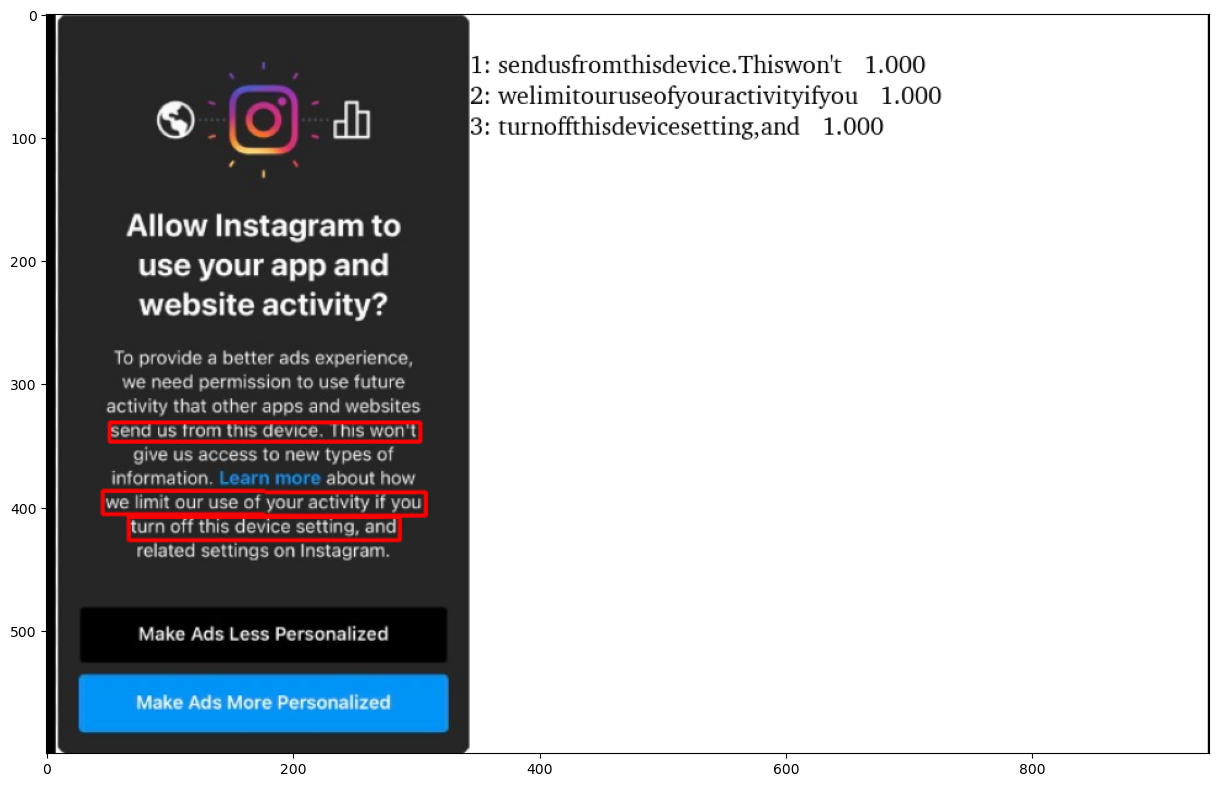

In [166]:
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, box, senti, font_path=font_path) 
 
plt.imshow(annotated)